In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_train = pd.read_csv('train_energy_data.csv')
df_test = pd.read_csv('test_energy_data.csv')

In [3]:
df_train.head()

,Building Type,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Day of Week,Energy Consumption
0,Residential,7063,76,10,29.84,Weekday,2713.95
1,Commercial,44372,66,45,16.72,Weekday,5744.99
2,Industrial,19255,37,17,14.30,Weekend,4101.24
3,Residential,13265,14,41,32.82,Weekday,3009.14
4,Commercial,13375,26,18,11.92,Weekday,3279.17


In [4]:
df_test.head()

,Building Type,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Day of Week,Energy Consumption
0,Residential,24563,15,4,28.52,Weekday,2865.57
1,Commercial,27583,56,23,23.07,Weekend,4283.80
2,Commercial,45313,4,44,33.56,Weekday,5067.83
3,Residential,41625,84,17,27.39,Weekend,4624.30
4,Residential,36720,58,47,17.08,Weekday,4820.59


In [5]:
df_train.columns

Index(['Building Type', 'Square Footage', 'Number of Occupants',
       'Appliances Used', 'Average Temperature', 'Day of Week',
       'Energy Consumption'],
      dtype='object')

In [6]:
df_train.isna().sum()

Building Type          0
Square Footage         0
Number of Occupants    0
Appliances Used        0
Average Temperature    0
Day of Week            0
Energy Consumption     0
dtype: int64

In [7]:
df_test.isna().sum()

Building Type          0
Square Footage         0
Number of Occupants    0
Appliances Used        0
Average Temperature    0
Day of Week            0
Energy Consumption     0
dtype: int64

In [9]:
df_train[df_train.duplicated()]

,Building Type,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Day of Week,Energy Consumption


In [10]:
df_test[df_test.duplicated()]

,Building Type,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Day of Week,Energy Consumption


In [11]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Building Type        1000 non-null   object 
 1   Square Footage       1000 non-null   int64  
 2   Number of Occupants  1000 non-null   int64  
 3   Appliances Used      1000 non-null   int64  
 4   Average Temperature  1000 non-null   float64
 5   Day of Week          1000 non-null   object 
 6   Energy Consumption   1000 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 54.8+ KB


In [12]:
df_train.describe()

,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Energy Consumption
count,1000.000,1000.000000,1000.000000,1000.000000,1000.000000
mean,25462.388,48.372000,25.606000,22.611390,4166.252570
std,14294.554,29.061972,14.105166,7.139943,933.313064
min,560.000,1.000000,1.000000,10.050000,1683.950000
25%,13169.750,22.000000,13.000000,16.475000,3509.482500
50%,25477.000,47.000000,26.000000,22.815000,4175.730000
75%,37446.250,73.250000,38.000000,28.850000,4863.850000
max,49997.000,99.000000,49.000000,34.990000,6530.600000


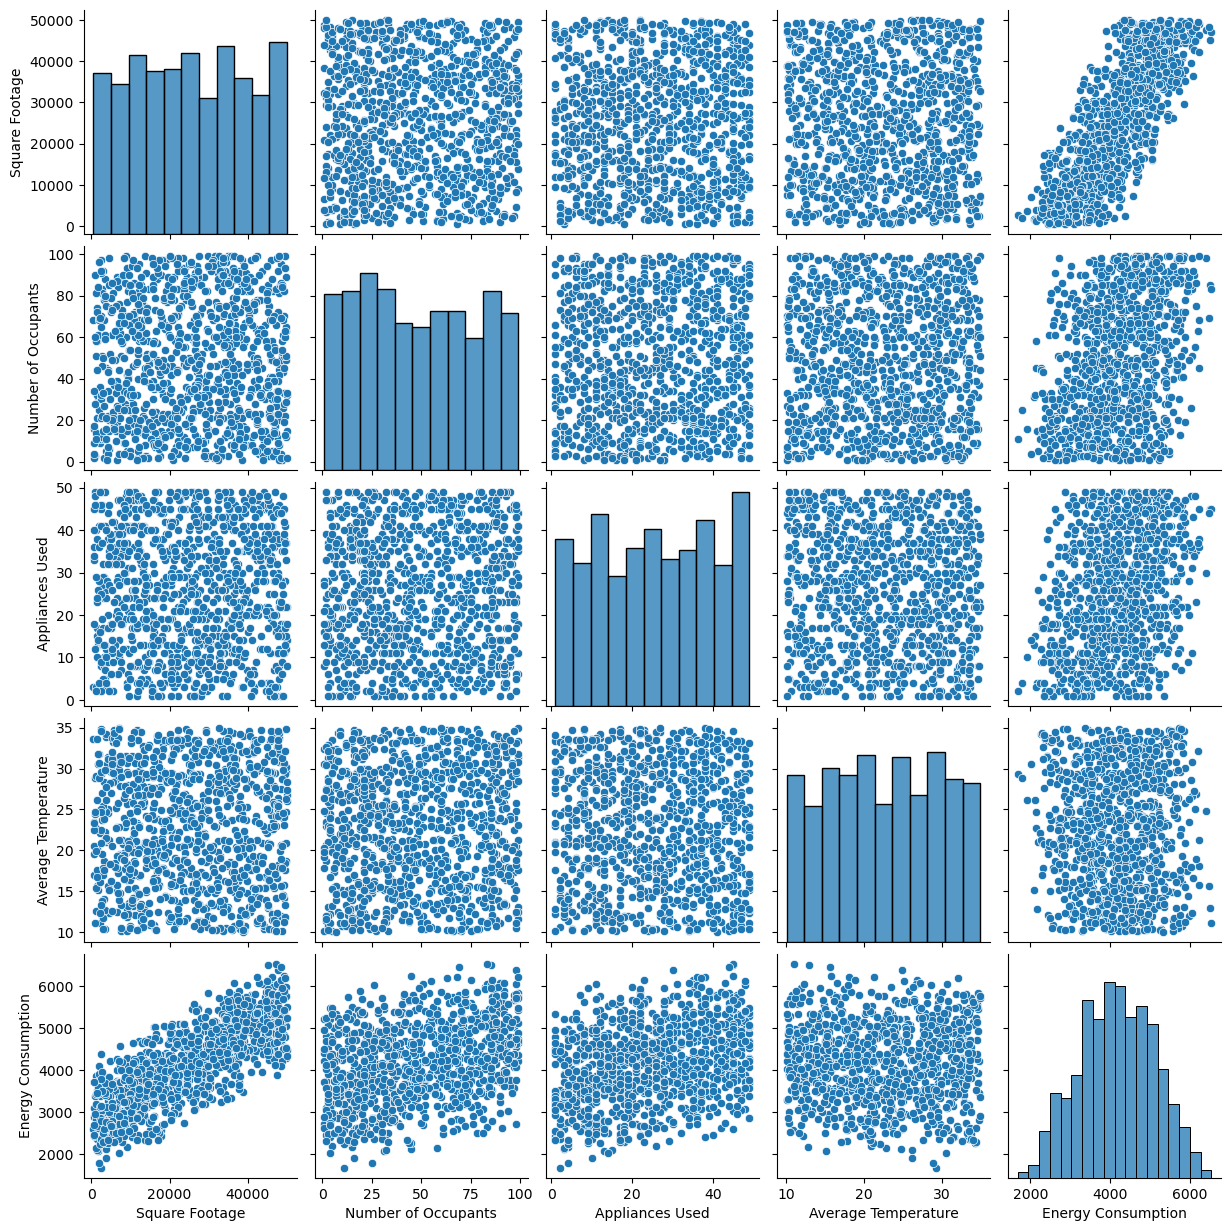

In [13]:
sns.pairplot(df_train)

<Axes: >

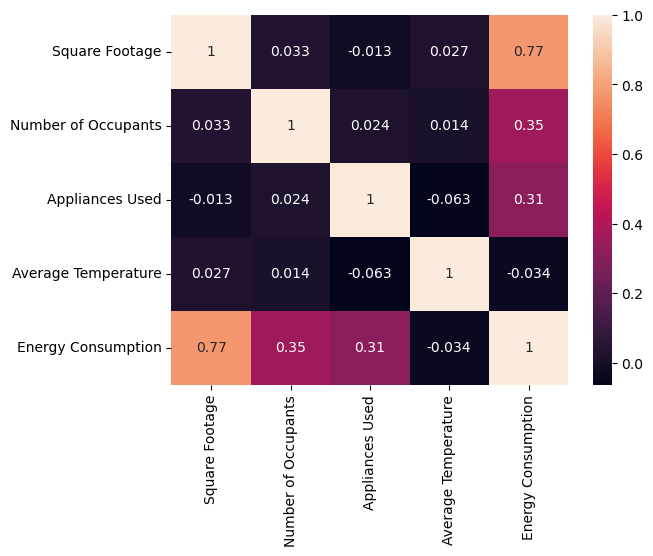

In [23]:
sns.heatmap(df_train.corr(numeric_only=True), annot=True)

In [24]:
# We Can Drop Avg Tamp

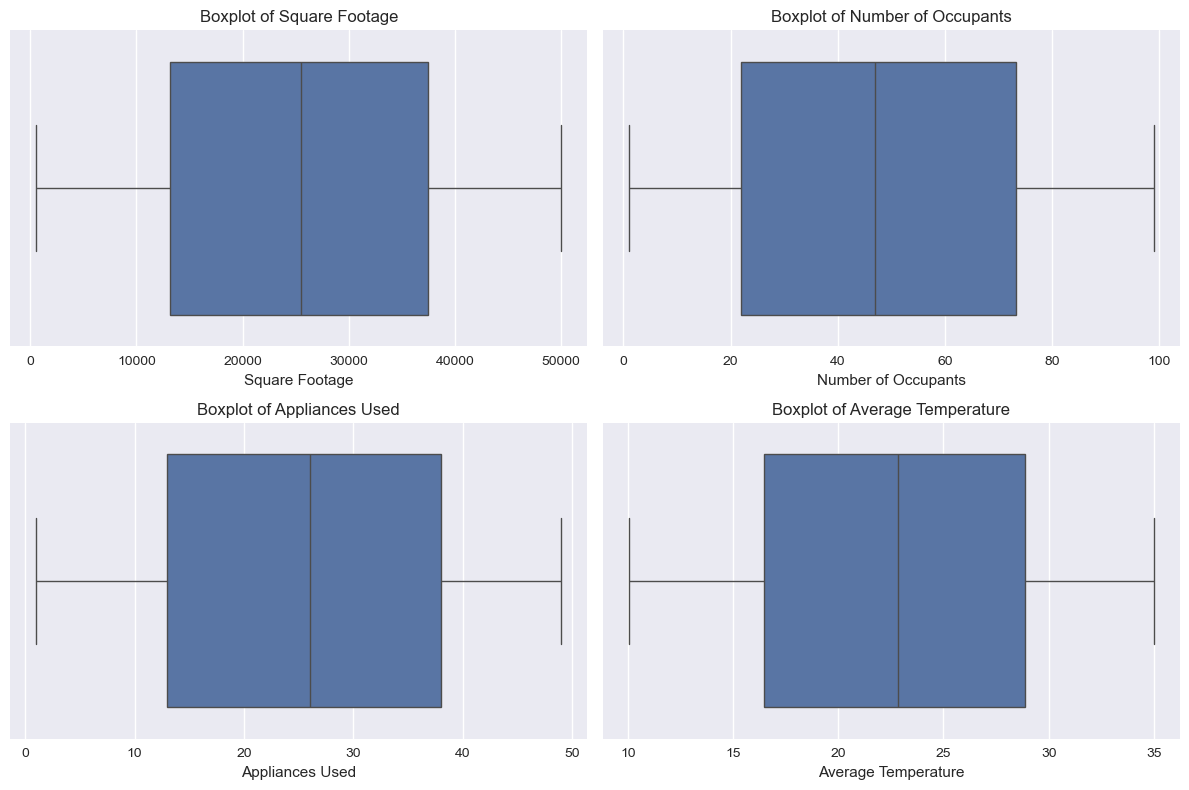

In [31]:
# List of columns to plot
columns = ['Square Footage', 'Number of Occupants', 'Appliances Used', 'Average Temperature']
# Create a figure with 2x2 subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 8))  # 2 rows, 2 columns
# Flatten axes array for easy iteration
axes = axes.flatten()
# Loop through columns and axes to plot
for i, col in enumerate(columns):
    sns.boxplot(data=df_train, x=col, ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')

plt.tight_layout()  # Adjust spacing
plt.show()

In [32]:
df_train.groupby(by='Building Type')['Energy Consumption'].mean()

Building Type
Commercial     4130.023571
Industrial     4735.142618
Residential    3681.626628
Name: Energy Consumption, dtype: float64

In [33]:
df_train.groupby(by='Day of Week')['Energy Consumption'].mean()

Day of Week
Weekday    4170.293491
Weekend    4162.096897
Name: Energy Consumption, dtype: float64

In [34]:
df_train.groupby(by=['Building Type', 'Day of Week'])['Energy Consumption'].mean()

Building Type  Day of Week
Commercial     Weekday        4116.690479
               Weekend        4143.198876
Industrial     Weekday        4747.906624
               Weekend        4722.617938
Residential    Weekday        3723.662022
               Weekend        3634.721280
Name: Energy Consumption, dtype: float64

In [36]:
# we can drop day of weak also

In [38]:
df_train.drop(columns=['Average Temperature', 'Day of Week'], inplace=True)

In [42]:
df_test.drop(columns=['Average Temperature', 'Day of Week'], inplace=True)

In [39]:
# Now Setting Up Model

In [41]:
df_train.head()

,Building Type,Square Footage,Number of Occupants,Appliances Used,Energy Consumption
0,Residential,7063,76,10,2713.95
1,Commercial,44372,66,45,5744.99
2,Industrial,19255,37,17,4101.24
3,Residential,13265,14,41,3009.14
4,Commercial,13375,26,18,3279.17


In [46]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

In [44]:
X_train = df_train.drop('Energy Consumption', axis=1)
y_train = df_train['Energy Consumption']

In [45]:
X_test = df_test.drop('Energy Consumption', axis=1)
y_test = df_test['Energy Consumption']

In [47]:
numeric_features = ['Square Footage', 'Number of Occupants', 'Appliances Used']

preprocessing = ColumnTransformer(transformers=[
    ('ohe', OneHotEncoder(drop='first'), ['Building Type']),  # One-hot encode categorical
    ('scaler', StandardScaler(), numeric_features)            # Scale numerical features
], remainder='drop')

In [48]:
lr_pipeline = Pipeline(steps=[
    ('preprocessing', preprocessing),
    ('model', LinearRegression())
])

In [49]:
lr_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('ohe',
                                                  OneHotEncoder(drop='first'),
                                                  ['Building Type']),
                                                 ('scaler', StandardScaler(),
                                                  ['Square Footage',
                                                   'Number of Occupants',
                                                   'Appliances Used'])])),
                ('model', LinearRegression())])

In [50]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, root_mean_squared_error

In [51]:
y_test_pred =  lr_pipeline.predict(X_test)

In [52]:
r2_score(y_test, y_test_pred)

0.9977414960153677

In [53]:
mean_squared_error(y_test, y_test_pred)

1549.8404152398334

In [54]:
mean_absolute_error(y_test, y_test_pred)

32.35784068008417

In [55]:
root_mean_squared_error(y_test, y_test_pred)

39.36801258940859

In [56]:
# Lets See Now For Assuptions

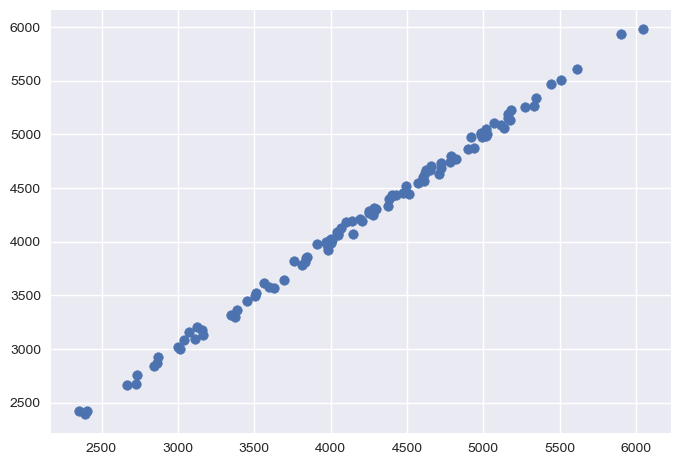

In [57]:
plt.scatter(y_test, y_test_pred)

In [58]:
# Showing Linear Relations + 1

0     -2.001229
1    -28.198161
2    -34.473546
3    -45.257829
4     49.865454
        ...    
95    10.651501
96   -19.315581
97    -1.125617
98    30.939163
99    -7.936296
Name: Energy Consumption, Length: 100, dtype: float64


<Axes: xlabel='Energy Consumption', ylabel='Density'>

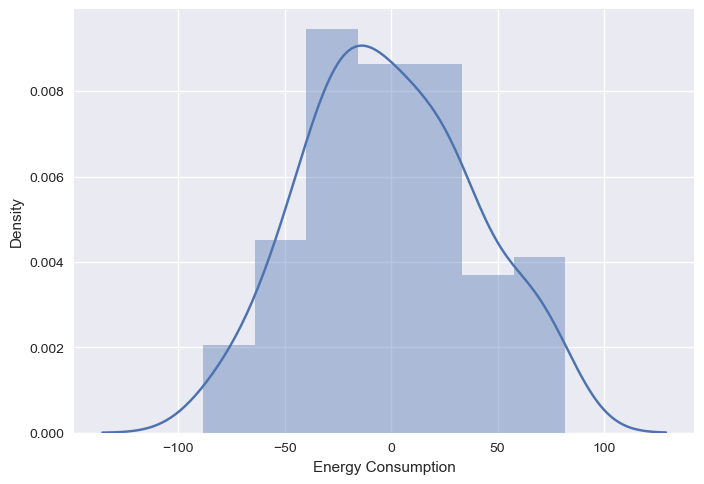

In [59]:
residuals = y_test - y_test_pred
print(residuals)
sns.distplot(residuals, kde = True)

In [61]:
# Residuals Are Normally Distributed + 2

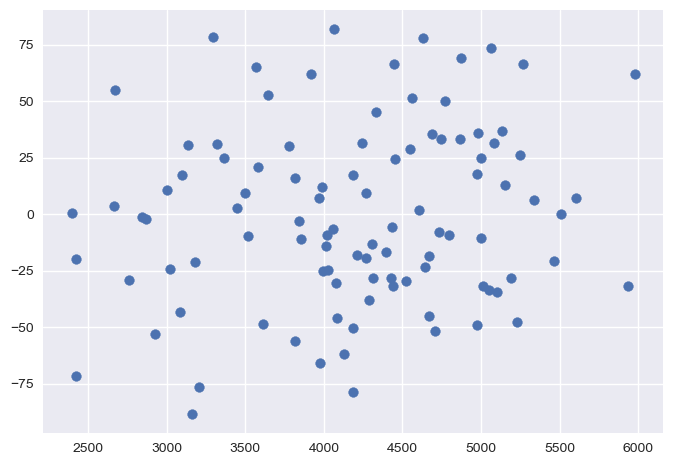

In [63]:
plt.scatter(y_test_pred,residuals)

In [65]:
# Scatter plot with respect to prediction and residuals -  uniform distribution + 3

In [66]:
# That Means Model Is Good At Predicting

In [68]:
# Lets Make Moodel More Reliable

In [69]:
from sklearn.linear_model import ElasticNetCV

In [103]:
pipeline_enc = Pipeline(steps=[
    ('preprocessing', preprocessing),
    ('model', ElasticNetCV(cv=5, l1_ratio=0.7, random_state=42))
])

In [104]:
pipeline_enc.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('ohe',
                                                  OneHotEncoder(drop='first'),
                                                  ['Building Type']),
                                                 ('scaler', StandardScaler(),
                                                  ['Square Footage',
                                                   'Number of Occupants',
                                                   'Appliances Used'])])),
                ('model', ElasticNetCV(cv=5, l1_ratio=0.7, random_state=42))])

In [105]:
y_pred_enc = pipeline_enc.predict(X_test)

In [106]:
r2_score(y_test, y_pred_enc)

0.900410873878268

In [107]:
mean_squared_error(y_test, y_pred_enc)

68340.48274083633

In [108]:
mean_absolute_error(y_test, y_pred_enc)

215.90096892713996

In [109]:
root_mean_squared_error(y_test, y_pred_enc)

261.42012688551034

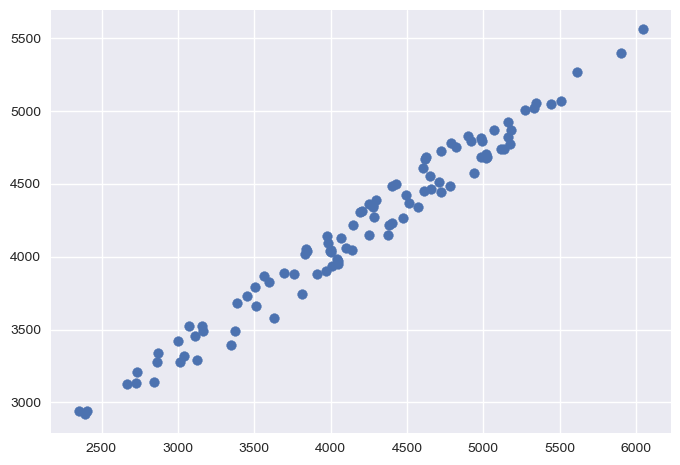

In [110]:
plt.scatter(y_test, y_pred_enc)

0    -413.784459
1       9.891949
2     200.351739
3     -55.823816
4      66.219347
         ...    
95   -263.860356
96   -115.353777
97   -299.464864
98    -43.194472
99     -1.824964
Name: Energy Consumption, Length: 100, dtype: float64


<Axes: xlabel='Energy Consumption', ylabel='Density'>

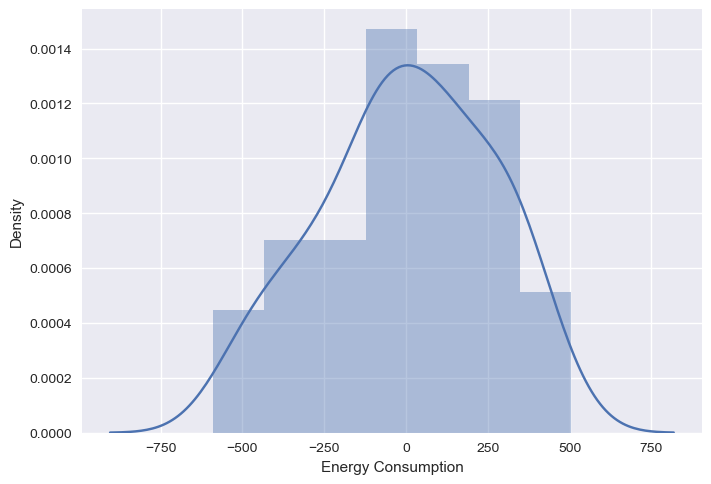

In [111]:
residuals = y_test - y_pred_enc
print(residuals)
sns.distplot(residuals, kde = True)

In [113]:
# Conclusion Is Lasso CV Is Good For General Model

In [118]:
import pickle

pickle.dump(pipeline_enc, open('enc_model.pkl', 'wb'))

In [119]:
pickle.dump(lr_pipeline, open('lr_model.pkl', 'wb'))